In [18]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Creating our own model 

## 2D-dataset

In [19]:
class myGDResgressor:

    def __init__(self, learning_rate = 0.01, epochs = 100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = 100
        self.c = 100

    
    def fit(self, X_train, y_train):
        for i in range(self.epochs):
            loss_slope_c = -2 * np.sum(y_train - self.m * X_train.ravel() - self.c)
            loss_slope_m = -2 * np.sum((y_train - self.m * X_train.ravel() - self.c) * (X_train.ravel()))
            
            self.c = self.c - (self.learning_rate * loss_slope_c)
            self.m = self.m - (self.learning_rate * loss_slope_m)
            # print(self.m , self.c)
            
        print(self.m , self.c)

    
    def predict(self, X_test):
        y_pred = (self.m * X_test + self.c)
        return y_pred


    def my_r2_score(self, y_test, y_pred):
        u = 0
        v = 0
       
        u += np.sum((y_test - y_pred) ** 2)
        v += np.sum((y_test - y_test.mean()) ** 2)
            
        r2 = 1 - (u / v)
        return r2

    
    def my_mean_squared_error(self, y_test, y_pred):
        return np.sum((y_test - y_pred) ** 2) / len(y_test)

    
    def my_mean_absolute_error(self, y_test, y_pred):
        return np.sum(abs(y_test- y_pred)) / len(y_test)

## nD-dataset

In [62]:
class my_n_GDResgressor:
    
    def __init__(self, learning_rate = 0.01, epochs = 100):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
            # print("Shape of y_hat : ", y_train.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.learning_rate * intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat), X_train) / X_train.shape[0]
            self.coef_ = self.coef_ - (self.learning_rate * coef_der)

        print(self.intercept_, self.coef_)


    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

    def my_r2_score(self, y_test, y_pred):
        u = 0
        v = 0
       
        u += np.sum((y_test - y_pred) ** 2)
        v += np.sum((y_test - y_test.mean()) ** 2)

        r2 = 1 - (u / v)

        return r2

    def my_mean_absolute_error(self, y_test, y_pred):
        ae = 0

        for i in range(len(y_test)):
            ae += abs(y_test[i] - y_pred[i])


        mae = ae / len(y_test)
        return mae

        
    def my_mean_squared_error(self, y_test, y_pred):
        se = 0

        for i in range(len(y_test)):
            se += (y_test[i] - y_pred[i]) ** 2

        mse = se / len(y_test)
        return mse
        

# Datset 

## 2-D data

In [43]:
X, y = make_regression(n_samples = 500, n_features = 1, n_informative = 1, n_targets = 1, noise = 30, random_state = 20) 

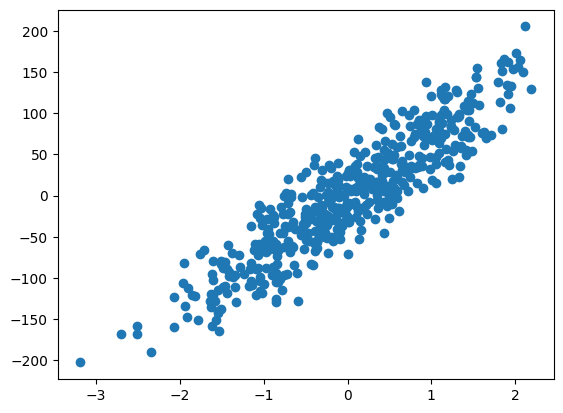

In [44]:
plt.scatter(X, y)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## n-D data

In [78]:
from sklearn.datasets import load_diabetes
nX, ny = load_diabetes(return_X_y=True)
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(nX, ny, test_size = 0.2, random_state = 2)

# Testing my model

## 2-D

In [63]:
gdr = myGDResgressor(0.001, 50)
gdr.fit(X_train, y_train)

67.41635886576948 -1.3276154008936323


In [64]:
y_pred = gdr.predict(X_test)

In [65]:
print("MAE :", gdr.my_mean_absolute_error(y_test.ravel(), y_pred.ravel()))
print("MSE :", gdr.my_mean_squared_error(y_test.ravel(), y_pred.ravel()))
print("R2 Score :", gdr.my_r2_score(y_test.ravel(), y_pred.ravel()))

MAE : 28.52504321633912
MSE : 1154.9397595179896
R2 Score : 0.7686065903401599


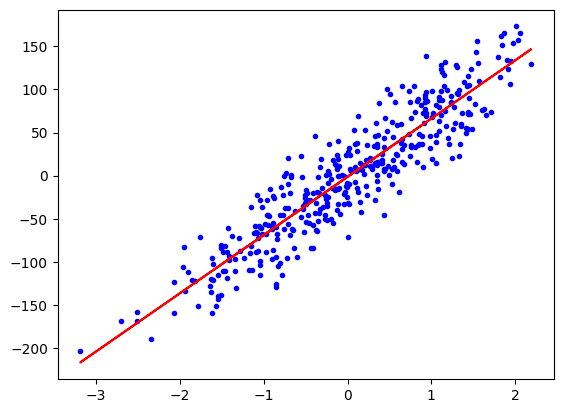

In [71]:
plt.plot(X_train, y_train, '.b')
plt.plot(X_train, gdr.predict(X_train), color='r')
plt.show()

## n-D

In [72]:
ngdr = my_n_GDResgressor(0.5, 1000)
ngdr.fit(n_X_train, n_y_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [73]:
y_pred = ngdr.predict(n_X_test)

In [74]:
print("MAE :", ngdr.my_mean_absolute_error(n_y_test, n_y_pred))
print("MSE :", ngdr.my_mean_squared_error(n_y_test, n_y_pred))
print("R2 Score :", ngdr.my_r2_score(n_y_test, n_y_pred))

MAE : 45.213034190469045
MSE : 3094.456671566062
R2 Score : 0.4399338661568968


# Testing using Sklearn

##  2-D

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
print(lr.coef_)
print(lr.intercept_)

[67.41635887]
-1.3276154008936325


In [34]:
y_pred = lr.predict(X_test)

In [35]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 Score :", r2_score(y_test, y_pred))

MAE : 28.52504321633912
MSE : 1154.9397595179896
R2 Score : 0.7686065903401599


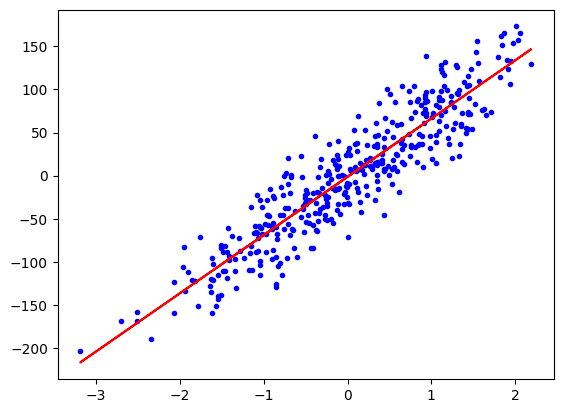

In [36]:
plt.plot(X_train, y_train, '.b')
plt.plot(X_train, lr.predict(X_train), color='r')
plt.show()

## n-D

In [37]:
nlr = LinearRegression()

In [38]:
nlr.fit(n_X_train, n_y_train)

LinearRegression()

In [39]:
n_y_pred = nlr.predict(n_X_test)

In [40]:
print(nlr.coef_)
print(nlr.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [41]:
print("MAE :", mean_absolute_error(n_y_test, n_y_pred))
print("MSE :", mean_squared_error(n_y_test, n_y_pred))
print("R2 Score :", r2_score(n_y_test, n_y_pred))

MAE : 45.21303419046903
MSE : 3094.4566715660626
R2 Score : 0.4399338661568968
